In [136]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import resample
%matplotlib inline

### Load data (pre-processed in clean.ipynb) and define useful constants

In [137]:
# load data
res = pd.read_csv("results/results_cleaned.csv")

# required fields
ids = ['timestamp','postId','workerId','mode']

# questions
qs = ['timestamp','postId','workerId','mode',
      'question1', 'question2', 'question3', 'question4', 'question5',
      'comments', 'response']

answers=["Strongly Disagree","Disagree","Neutral","Agree","Strongly Agree"]
modes = ["List", "Category", "Pairwise"]
questions = ['question1', 'question2', 'question3', 'question4', 'question5']
titles = ["The final ranking generated by the system reflected my personal preferences about colleges.",
"I would use this system to make decisions about colleges.",
"When I was entering colleges into the build tool, I could easily express my preferences.",
"The dataset contained all the colleges that I wanted to rank.",
"The system displayed all the details about the colleges that I needed to compare them." ]

In [170]:
amts = [13,12,5]

### Plot questions

In [139]:
# compute bootstrapped confidence interval
def bootstrap_mean(data, n_bootstraps):
    bootstraps = []
    for i in range(n_bootstraps):
        # Sample with replacement from data
        bootstraps.append(resample(data).mean())
    return pd.Series(bootstraps)

In [140]:
# should we change the interactions to just be add remove? 
# can tell by url if high low etc

res.replace(to_replace=['ADD', 'HIGH ADD', 'LOW ADD', 'LEFT ADD', 'RIGHT ADD'], value ='ADD', inplace=True)
res.replace(to_replace=['REMOVE', 'HIGH REMOVE', 'LOW REMOVE', 'LEFT REMOVE', 'RIGHT REMOVE'], value ='REMOVE', inplace=True)

In [149]:
l =res[res['mode']=='List'].dropna(subset=['question1'])[["workerId","question1"]].drop_duplicates()
l.shape

(15, 2)

In [150]:
p = res[res['mode']=='Pairwise'].dropna(subset=['question1'])[["workerId","question1"]].drop_duplicates()
p.shape

(6, 2)

In [151]:
c = res[res['mode']=='Category'].dropna(subset=['question1'])[["workerId","question1"]].drop_duplicates()
c.shape

(13, 2)

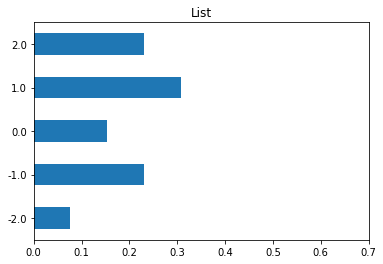

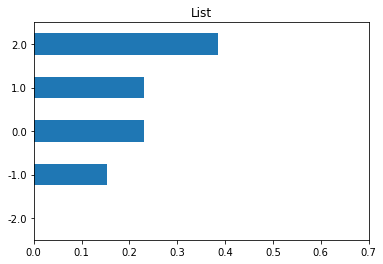

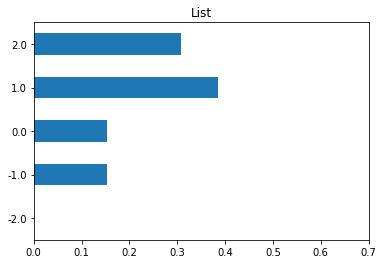

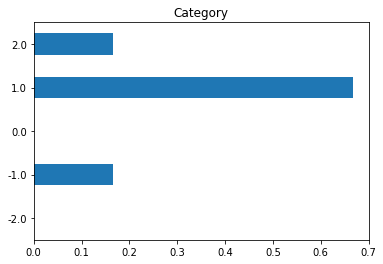

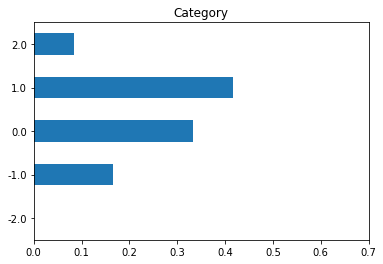

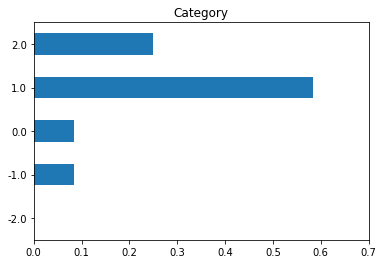

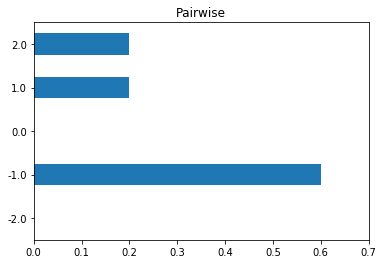

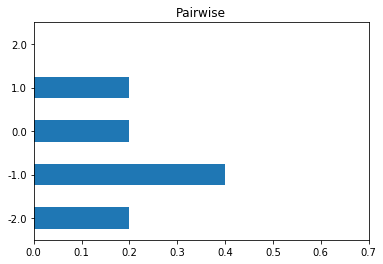

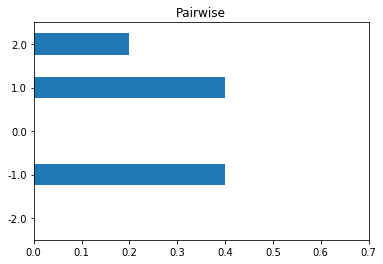

In [160]:
questions = ['question1', 'question2', 'question3']
for j,m in enumerate(modes):
    df = pd.DataFrame(index=[-2.0,-1.0,0.0,1.0,2.0])
    for i,q in enumerate(questions):
        c = res[res['mode']==m].sort_values("timestamp", ascending=False).dropna(
            subset=[q])[["workerId",q]].drop_duplicates()
        c.drop_duplicates(subset=["workerId"], keep='first', inplace=True)
        df[q] = c[q].value_counts()
        df[q] = df[q]/amts[j]
        ax = df[q].plot.barh()
        ax.set_xlim(0,0.7)
        ax.set_title(m)
#         ax.set_yticklabels(answers)
        plt.savefig("results/no_label"+m+"_"+q+".png")
        plt.show()
        plt.gcf().clear()


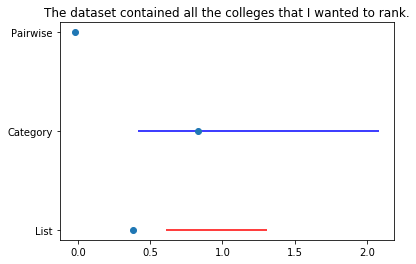

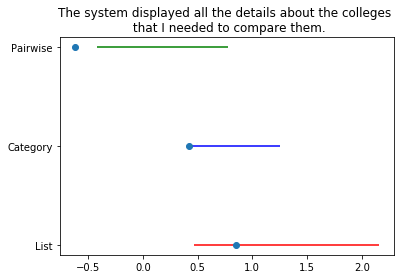

IndexError: list index out of range

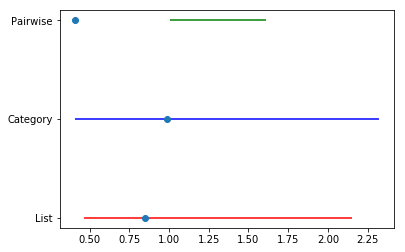

In [177]:
questions = ['question1', 'question2', 'question3', 'question4', 'question5']
boot_questions = {}
df = pd.DataFrame(index=[-2.0,-1.0,0.0,1.0,2.0])
for i,q in enumerate(questions):
    d = res.sort_values("timestamp", ascending=False).dropna(subset=[q])[["mode","workerId",q]].drop_duplicates()
    d.drop_duplicates(subset=["workerId"], keep='first', inplace=True)
    boot = pd.DataFrame()
    for m in modes:
        boot[m]=bootstrap_mean(d[d["mode"] == m][q], 1000)
    mean = boot.mean()
    err = []
    err.append(boot.apply(lambda x : np.percentile(x, (5))))
    err.append(boot.apply(lambda x : np.percentile(x, (95))))

    plt.errorbar(mean, [0,1,2], xerr=err, fmt='o-',linestyle='none', ecolor=['red','blue','green'])
    plt.yticks([0,1,2], mean.index)
    plt.title(titles[i])
#     plt.savefig(filename)
    plt.show()

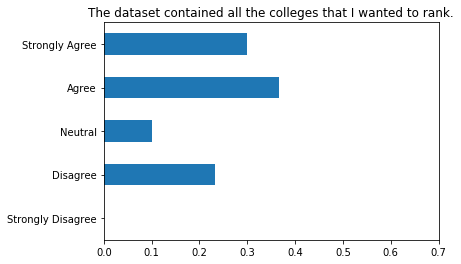

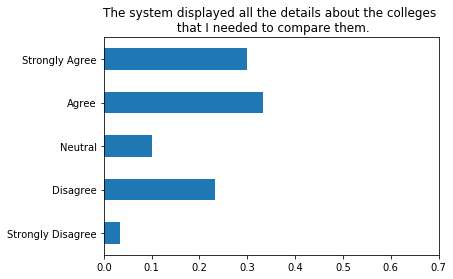

In [172]:
questions = ['question4', 'question5']
titles = ["The dataset contained all the colleges that I wanted to rank.",
"The system displayed all the details about the colleges \n that I needed to compare them." ]
df = pd.DataFrame(index=[-2.0,-1.0,0.0,1.0,2.0])
for i,q in enumerate(questions):
    c = res.sort_values("timestamp", ascending=False).dropna(
            subset=[q])[["workerId",q]].drop_duplicates()
    c.drop_duplicates(subset=["workerId"], keep='first', inplace=True)
    df[q] = c[q].value_counts()
    df[q] = df[q]/30
    ax = df[q].plot.barh()
    ax.set_xlim(0,0.7)
    ax.set_title(titles[i])
    ax.set_yticklabels(answers)
    plt.savefig("results/label_"+q+".png", bbox_inches='tight')
    plt.show()
    plt.gcf().clear()
    

In [169]:
d = res.sort_values("timestamp", ascending=False).dropna(subset=['question1'])[["mode","workerId",'question1']].drop_duplicates()
d[d["mode"] == 'List']

,mode,workerId,question1
982,List,A5IELMRC1OIQO,2.0
359,List,AG7C4X3WKKBV,1.0
868,List,AQKB8JSBEMXK9,-1.0
815,List,A1PTH9KTRO06EG,-2.0
436,List,A1PTH9KTRO06EG,-1.0
188,List,A1PTH9KTRO06EG,0.0
530,List,A3NBGNDNDGF10U,1.0
94,List,A1PP6DN7HB6Q9P,0.0
20,List,A3MK7F6KT80AZT,2.0
804,List,A1JQ4KBFW7U3N1,2.0


In [163]:
boot_questions[q]

,List,Category,Pairwise
0,0.000000,1.083333,0.2
1,-0.133333,1.250000,0.8
2,0.666667,0.916667,1.4
3,0.266667,1.166667,0.2
4,1.066667,1.416667,0.8
5,0.600000,1.000000,0.2
6,0.733333,1.083333,0.2
7,0.666667,1.166667,0.2
8,0.133333,1.250000,-0.4
9,-0.200000,1.000000,0.8


In [158]:
# for q in boot_questions:
#     for m in modes:
#         print(np.percentile(boot_questions[q][m], (5,95))[1,])

List        0.286667
Category    0.850769
Pairwise   -0.100000
dtype: float64
[List       -0.200000
Category    0.461538
Pairwise   -0.833333
dtype: float64, List        0.670000
Category    1.230769
Pairwise    0.675000
dtype: float64]


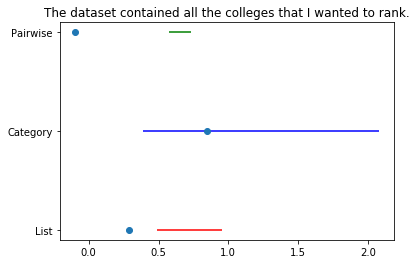

List        0.816429
Category    0.485385
Pairwise   -0.612000
dtype: float64
[List        0.353571
Category    0.076923
Pairwise   -1.400000
dtype: float64, List        1.285714
Category    0.846154
Pairwise    0.010000
dtype: float64]


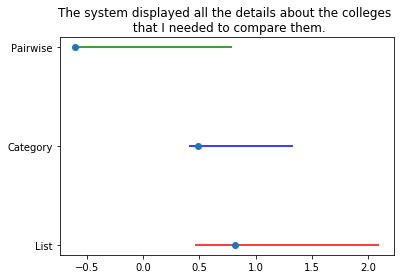

List        0.606250
Category    0.833846
Pairwise    0.362000
dtype: float64
[List        0.184375
Category    0.457692
Pairwise   -0.400000
dtype: float64, List        0.940625
Category    1.230769
Pairwise    1.210000
dtype: float64]


IndexError: list index out of range

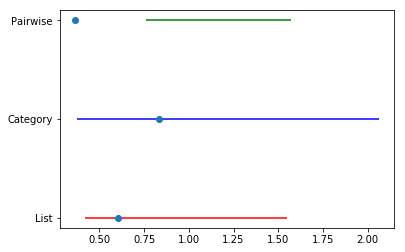

In [167]:
# How to compute error for confidence intervals???
# using stdev here works, but using percentile looks wrong

for j,q in enumerate(boot_questions):
    boot = boot_questions[q]
    mean = boot.mean()
    err = []
    err.append(boot.apply(lambda x : np.percentile(x, (5))))
    err.append(boot.apply(lambda x : np.percentile(x, (95))))
    print(mean)
    print(err)
    plt.errorbar(mean, [0,1,2], xerr=err, fmt='o-',linestyle='none', ecolor=['red','blue','green'])
    plt.yticks([0,1,2], mean.index)
    plt.title(titles[j])
    plt.savefig("results/"+q+".png")
    plt.show()
    plt.gcf().clear()